# Topic 19: Multiple Regression and Model Validation

## a. Making Predictions in Statsmodels

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')

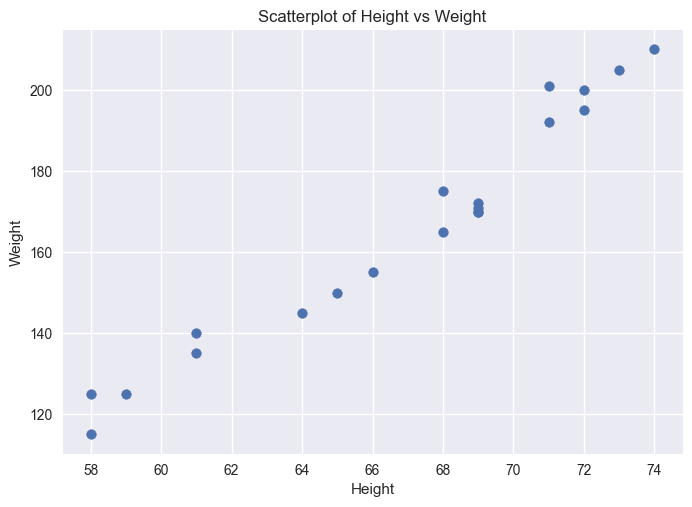

In [2]:
df = pd.read_csv('heightWeight.csv')
plt.scatter(df.height, df.weight)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Scatterplot of Height vs Weight")
plt.show()

In [4]:
f = 'weight~height'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     384.8
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           1.35e-13
Time:                        00:26:30   Log-Likelihood:                -64.112
No. Observations:                  20   AIC:                             132.2
Df Residuals:                      18   BIC:                             134.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -204.4834     18.929    -10.802      0.000    -244.252    -164.714
height         5.5390      0.282     19.616      0.000       4.946       6.132
==============================================================================
Omnibus:                        2.588   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.274   Jarque-Bera (JB):                1.245
Skew:                           0.202   Prob(JB):                        0.537
Kurtosis:                       1.846   Cond. No.                         902.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
df.head()

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


In [6]:
df.iloc[4]

height     71
weight    192
Name: 4, dtype: int64

In [7]:
model.predict(df.iloc[4])

4    188.78693
dtype: float64

In [8]:
to_predict = 4

print('Actual weight: ', df.iloc[to_predict]['weight'])
print('Predicted weight: ', model.predict(df.iloc[to_predict])[to_predict])

Actual weight:  192
Predicted weight:  188.7869298157287


In [9]:
def predict_weight(height):
    w = -204.4834 + 5.539*height
    return f"With a height of {height} inches, predicted weight of {round(w, 2)} pounds."

In [10]:
predict_weight(60)

'With a height of 60 inches, predicted weight of 127.86 pounds.'

## b. Multiple Regression

In [11]:
car_df = pd.read_csv('auto-mpg.csv')
car_df.rename({'model year': 'year'}, axis='columns', inplace=True)
car_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [12]:
formula = 'mpg ~ cylinders+displacement+acceleration+weight+year+origin'
model = ols(formula=formula, data=car_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     293.9
Date:                Mon, 19 Sep 2022   Prob (F-statistic):          2.42e-140
Time:                        00:43:12   Log-Likelihood:                -1024.2
No. Observations:                 392   AIC:                             2062.
Df Residuals:                     385   BIC:                             2090.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -19.7438      4.168     -4.737      0.000     -27.939     -11.549
cylinders       -0.4447      0.321     -1.385      0.167      -1.076       0.187
displacement     0.0172      0.007      2.390      0.017       0.003       0.031
acceleration     0.1557      0.078      2.002      0.046       0.003       0.309
weight          -0.0068      0.001    -11.767      0.000      -0.008      -0.006
year             0.7647      0.050     15.378      0.000       0.667       0.862
origin           1.3460      0.271      4.975      0.000       0.814       1.878
==============================================================================
Omnibus:                       30.593   Durbin-Watson:                   1.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.017
Skew:                           0.509   Prob(JB):                     8.35e-12
Kurtosis:                       4.444   Cond. No.                     7.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## c. Categorical Variables

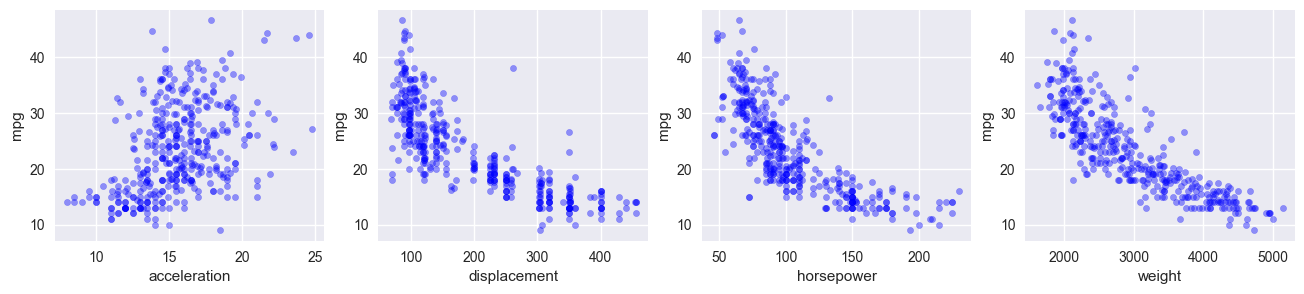

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['acceleration', 'displacement', 'horsepower', 'weight'], axes):
    car_df.plot(kind='scatter', x=xcol, y='mpg', ax=ax, alpha=0.4, color='b')

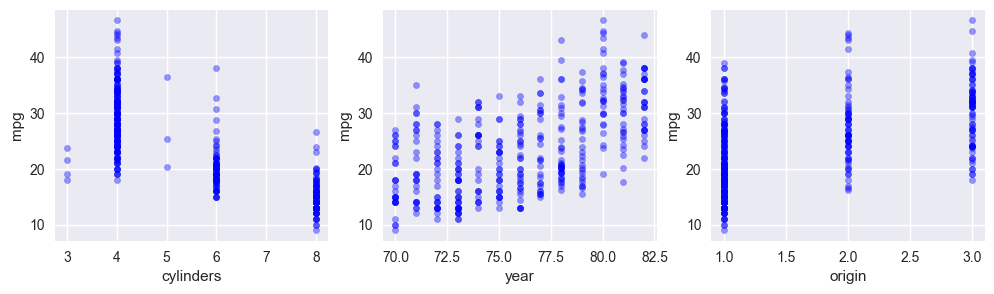

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3))

for xcol, ax in zip([ 'cylinders', 'year', 'origin'], axes):
    car_df.plot(kind='scatter', x=xcol, y='mpg', ax=ax, alpha=0.4, color='b')

In [15]:
cyl_dummies = pd.get_dummies(car_df['cylinders'], prefix='cyl', drop_first=True)
yr_dummies = pd.get_dummies(car_df['year'], prefix='yr', drop_first=True)
orig_dummies = pd.get_dummies(car_df['origin'], prefix='orig', drop_first=True)

In [16]:
data = car_df.drop(['cylinders','year','origin', 'car name'], axis=1)
data = pd.concat([data, cyl_dummies, yr_dummies, orig_dummies], axis=1)
data.head()

,mpg,displacement,horsepower,weight,acceleration,cyl_4,cyl_5,cyl_6,cyl_8,yr_71,...,yr_75,yr_76,yr_77,yr_78,yr_79,yr_80,yr_81,yr_82,orig_2,orig_3
0,18.0,307.0,130,3504,12.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,350.0,165,3693,11.5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,318.0,150,3436,11.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,304.0,150,3433,12.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,302.0,140,3449,10.5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
data.columns[1:]

Index(['displacement', 'horsepower', 'weight', 'acceleration', 'cyl_4',
       'cyl_5', 'cyl_6', 'cyl_8', 'yr_71', 'yr_72', 'yr_73', 'yr_74', 'yr_75',
       'yr_76', 'yr_77', 'yr_78', 'yr_79', 'yr_80', 'yr_81', 'yr_82', 'orig_2',
       'orig_3'],
      dtype='object')

In [18]:
formula = 'mpg ~ '+ '+'.join(data.columns[1:])
formula

'mpg ~ displacement+horsepower+weight+acceleration+cyl_4+cyl_5+cyl_6+cyl_8+yr_71+yr_72+yr_73+yr_74+yr_75+yr_76+yr_77+yr_78+yr_79+yr_80+yr_81+yr_82+orig_2+orig_3'

In [19]:
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     116.8
Date:                Mon, 19 Sep 2022   Prob (F-statistic):          2.64e-151
Time:                        01:00:09   Log-Likelihood:                -954.59
No. Observations:                 392   AIC:                             1955.
Df Residuals:                     369   BIC:                             2047.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       30.9168      2.361     13.095      0.000      26.274      35.559
displacement     0.0118      0.007      1.745      0.082      -0.001       0.025
horsepower      -0.0392      0.013     -3.010      0.003      -0.065      -0.014
weight          -0.0052      0.001     -8.300      0.000      -0.006      -0.004
acceleration     0.0036      0.087      0.042      0.967      -0.167       0.174
cyl_4            6.9399      1.537      4.516      0.000       3.918       9.962
cyl_5            6.6377      2.337      2.840      0.005       2.042      11.234
cyl_6            4.2973      1.706      2.519      0.012       0.943       7.652
cyl_8            6.3668      1.969      3.234      0.001       2.495      10.238
yr_71            0.9104      0.816      1.116      0.265      -0.693       2.514
yr_72           -0.4903      0.804     -0.610      0.542      -2.071       1.090
yr_73           -0.5529      0.721     -0.766      0.444      -1.972       0.866
yr_74            1.2420      0.855      1.453      0.147      -0.439       2.923
yr_75            0.8704      0.837      1.039      0.299      -0.776       2.517
yr_76            1.4967      0.802      1.866      0.063      -0.080       3.074
yr_77            2.9987      0.820      3.657      0.000       1.386       4.611
yr_78            2.9738      0.779      3.816      0.000       1.442       4.506
yr_79            4.8962      0.825      5.936      0.000       3.274       6.518
yr_80            9.0589      0.875     10.351      0.000       7.338      10.780
yr_81            6.4582      0.864      7.477      0.000       4.760       8.157
yr_82            7.8376      0.849      9.228      0.000       6.167       9.508
orig_2           1.6933      0.516      3.280      0.001       0.678       2.708
orig_3           2.2929      0.497      4.616      0.000       1.316       3.270
==============================================================================
Omnibus:                       32.560   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.829
Skew:                           0.528   Prob(JB):                     7.53e-13
Kurtosis:                       4.518   Cond. No.                     7.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## d. Multicollinearity of Features

In [20]:
data.corr()

,mpg,displacement,horsepower,weight,acceleration,cyl_4,cyl_5,cyl_6,cyl_8,yr_71,...,yr_75,yr_76,yr_77,yr_78,yr_79,yr_80,yr_81,yr_82,orig_2,orig_3
mpg,1.000000,-0.805127,-0.778427,-0.832244,0.423329,0.760490,0.044171,-0.230873,-0.649667,-0.081464,...,-0.117412,-0.074024,-0.002523,0.025097,0.059727,0.361396,0.239804,0.315908,0.244313,0.451454
displacement,-0.805127,1.000000,0.897257,0.932994,-0.543800,-0.823346,-0.041520,0.118767,0.860257,0.050687,...,0.030634,0.009973,-0.008012,-0.050529,0.033205,-0.203867,-0.153497,-0.182566,-0.371633,-0.440825
horsepower,-0.778427,0.897257,1.000000,0.864538,-0.689196,-0.691741,-0.050568,-0.039952,0.835989,0.018166,...,-0.025482,-0.026870,0.004344,-0.039499,-0.023988,-0.190941,-0.169068,-0.172258,-0.284948,-0.321936
weight,-0.832244,0.932994,0.864538,1.000000,-0.416839,-0.804941,0.013018,0.137179,0.800244,0.016995,...,0.067604,0.036746,0.006465,-0.043401,0.025909,-0.171844,-0.146275,-0.184409,-0.293841,-0.447929
acceleration,0.423329,-0.543800,-0.689196,-0.416839,1.000000,0.383486,0.098549,0.134093,-0.560300,-0.053434,...,0.053146,0.044722,-0.010631,0.030495,0.027950,0.145813,0.078884,0.101206,0.208298,0.115020
cyl_4,0.760490,-0.823346,-0.691741,-0.804941,0.383486,1.000000,-0.089173,-0.526269,-0.606202,-0.034387,...,-0.061989,-0.040978,-0.004246,-0.022537,-0.053065,0.187252,0.114633,0.225921,0.356833,0.367556
cyl_5,0.044171,-0.041520,-0.050568,0.013018,0.098549,-0.089173,1.000000,-0.045514,-0.052427,-0.023885,...,-0.025281,-0.027063,-0.024356,0.073436,0.087019,0.091706,-0.024356,-0.025281,0.191692,-0.044119
cyl_6,-0.230873,0.118767,-0.039952,0.137179,0.134093,-0.526269,-0.045514,1.000000,-0.309407,0.056296,...,0.132661,0.062145,-0.022514,0.094650,-0.003347,-0.091646,0.025978,-0.078734,-0.171470,-0.166979
cyl_8,-0.649667,0.860257,0.835989,0.800244,-0.560300,-0.606202,-0.052427,-0.309407,1.000000,-0.002160,...,-0.041046,0.001366,0.014468,-0.069425,0.052706,-0.162370,-0.143071,-0.171860,-0.273496,-0.299924
yr_71,-0.081464,0.050687,0.018166,0.016995,-0.053434,-0.034387,-0.023885,0.056296,-0.002160,1.000000,...,-0.078296,-0.083817,-0.075433,-0.086489,-0.076874,-0.073973,-0.075433,-0.078296,-0.018188,-0.036194


In [21]:
# first check for linearity between target and features
data.corr()[abs(data.corr()['mpg']) > 0.3]

,mpg,displacement,horsepower,weight,acceleration,cyl_4,cyl_5,cyl_6,cyl_8,yr_71,...,yr_75,yr_76,yr_77,yr_78,yr_79,yr_80,yr_81,yr_82,orig_2,orig_3
mpg,1.000000,-0.805127,-0.778427,-0.832244,0.423329,0.760490,0.044171,-0.230873,-0.649667,-0.081464,...,-0.117412,-0.074024,-0.002523,0.025097,0.059727,0.361396,0.239804,0.315908,0.244313,0.451454
displacement,-0.805127,1.000000,0.897257,0.932994,-0.543800,-0.823346,-0.041520,0.118767,0.860257,0.050687,...,0.030634,0.009973,-0.008012,-0.050529,0.033205,-0.203867,-0.153497,-0.182566,-0.371633,-0.440825
horsepower,-0.778427,0.897257,1.000000,0.864538,-0.689196,-0.691741,-0.050568,-0.039952,0.835989,0.018166,...,-0.025482,-0.026870,0.004344,-0.039499,-0.023988,-0.190941,-0.169068,-0.172258,-0.284948,-0.321936
weight,-0.832244,0.932994,0.864538,1.000000,-0.416839,-0.804941,0.013018,0.137179,0.800244,0.016995,...,0.067604,0.036746,0.006465,-0.043401,0.025909,-0.171844,-0.146275,-0.184409,-0.293841,-0.447929
acceleration,0.423329,-0.543800,-0.689196,-0.416839,1.000000,0.383486,0.098549,0.134093,-0.560300,-0.053434,...,0.053146,0.044722,-0.010631,0.030495,0.027950,0.145813,0.078884,0.101206,0.208298,0.115020
cyl_4,0.760490,-0.823346,-0.691741,-0.804941,0.383486,1.000000,-0.089173,-0.526269,-0.606202,-0.034387,...,-0.061989,-0.040978,-0.004246,-0.022537,-0.053065,0.187252,0.114633,0.225921,0.356833,0.367556
cyl_8,-0.649667,0.860257,0.835989,0.800244,-0.560300,-0.606202,-0.052427,-0.309407,1.000000,-0.002160,...,-0.041046,0.001366,0.014468,-0.069425,0.052706,-0.162370,-0.143071,-0.171860,-0.273496,-0.299924
yr_80,0.361396,-0.203867,-0.190941,-0.171844,0.145813,0.187252,0.091706,-0.091646,-0.162370,-0.073973,...,-0.078296,-0.083817,-0.075433,-0.086489,-0.076874,1.000000,-0.075433,-0.078296,0.088224,0.189809
yr_82,0.315908,-0.182566,-0.172258,-0.184409,0.101206,0.225921,-0.025281,-0.078734,-0.171860,-0.078296,...,-0.082873,-0.088716,-0.079843,-0.091545,-0.081368,-0.078296,-0.079843,1.000000,-0.081198,0.070666
orig_3,0.451454,-0.440825,-0.321936,-0.447929,0.115020,0.367556,-0.044119,-0.166979,-0.299924,-0.036194,...,-0.048941,-0.064443,0.008819,0.016403,-0.093406,0.189809,0.156976,0.070666,-0.230157,1.000000


In [22]:
set1 = list(data.corr()[abs(data.corr()['mpg']) > 0.3].index)

In [23]:
# running model with only features correlated with mpg
formula = 'mpg ~ '+ '+'.join(set1[1:])
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 19 Sep 2022   Prob (F-statistic):          3.63e-133
Time:                        01:02:30   Log-Likelihood:                -1032.6
No. Observations:                 392   AIC:                             2085.
Df Residuals:                     382   BIC:                             2125.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       39.7900      2.258     17.621      0.000      35.350      44.230
displacement     0.0072      0.007      1.063      0.288      -0.006       0.020
horsepower      -0.0717      0.014     -5.132      0.000      -0.099      -0.044
weight          -0.0043      0.001     -6.271      0.000      -0.006      -0.003
acceleration    -0.0622      0.102     -0.613      0.541      -0.262       0.138
cyl_4            3.0900      0.685      4.514      0.000       1.744       4.436
cyl_8            2.3884      0.860      2.777      0.006       0.697       4.079
yr_80            6.7415      0.710      9.495      0.000       5.345       8.138
yr_82            5.2362      0.674      7.767      0.000       3.911       6.562
orig_3           1.7145      0.504      3.402      0.001       0.724       2.705
==============================================================================
Omnibus:                       25.747   Durbin-Watson:                   1.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.280
Skew:                           0.563   Prob(JB):                     1.61e-07
Kurtosis:                       3.806   Cond. No.                     4.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
data = data.loc[:,set1]
data.corr()

,mpg,displacement,horsepower,weight,acceleration,cyl_4,cyl_8,yr_80,yr_82,orig_3
mpg,1.000000,-0.805127,-0.778427,-0.832244,0.423329,0.760490,-0.649667,0.361396,0.315908,0.451454
displacement,-0.805127,1.000000,0.897257,0.932994,-0.543800,-0.823346,0.860257,-0.203867,-0.182566,-0.440825
horsepower,-0.778427,0.897257,1.000000,0.864538,-0.689196,-0.691741,0.835989,-0.190941,-0.172258,-0.321936
weight,-0.832244,0.932994,0.864538,1.000000,-0.416839,-0.804941,0.800244,-0.171844,-0.184409,-0.447929
acceleration,0.423329,-0.543800,-0.689196,-0.416839,1.000000,0.383486,-0.560300,0.145813,0.101206,0.115020
cyl_4,0.760490,-0.823346,-0.691741,-0.804941,0.383486,1.000000,-0.606202,0.187252,0.225921,0.367556
cyl_8,-0.649667,0.860257,0.835989,0.800244,-0.560300,-0.606202,1.000000,-0.162370,-0.171860,-0.299924
yr_80,0.361396,-0.203867,-0.190941,-0.171844,0.145813,0.187252,-0.162370,1.000000,-0.078296,0.189809
yr_82,0.315908,-0.182566,-0.172258,-0.184409,0.101206,0.225921,-0.171860,-0.078296,1.000000,0.070666
orig_3,0.451454,-0.440825,-0.321936,-0.447929,0.115020,0.367556,-0.299924,0.189809,0.070666,1.000000


In [25]:
# creating the correlation pairs
corr = data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
display(corr)

# setting the index to the pair of variables
corr['pairs'] = list(zip(corr.level_0, corr.level_1))
corr.set_index(['pairs'], inplace = True)
corr.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
corr.columns = ['cc']

corr.drop_duplicates(inplace=True)
corr[(corr.cc>.5) & (corr.cc<1)]

,level_0,level_1,0
0,mpg,mpg,1.000000
11,displacement,displacement,1.000000
88,yr_82,yr_82,1.000000
77,yr_80,yr_80,1.000000
66,cyl_8,cyl_8,1.000000
...,...,...,...
48,acceleration,yr_82,0.101206
87,yr_82,yr_80,0.078296
78,yr_80,yr_82,0.078296
89,yr_82,orig_3,0.070666


,cc
pairs,
"(weight, displacement)",0.932994
"(horsepower, displacement)",0.897257
"(weight, horsepower)",0.864538
"(cyl_8, displacement)",0.860257
"(cyl_8, horsepower)",0.835989
"(mpg, weight)",0.832244
"(displacement, cyl_4)",0.823346
"(mpg, displacement)",0.805127
"(cyl_4, weight)",0.804941


Let's drop variables that are highly correlated with other variables.

In [26]:
data

,mpg,displacement,horsepower,weight,acceleration,cyl_4,cyl_8,yr_80,yr_82,orig_3
0,18.0,307.0,130,3504,12.0,0,1,0,0,0
1,15.0,350.0,165,3693,11.5,0,1,0,0,0
2,18.0,318.0,150,3436,11.0,0,1,0,0,0
3,16.0,304.0,150,3433,12.0,0,1,0,0,0
4,17.0,302.0,140,3449,10.5,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
387,27.0,140.0,86,2790,15.6,1,0,0,1,0
388,44.0,97.0,52,2130,24.6,1,0,0,1,0
389,32.0,135.0,84,2295,11.6,1,0,0,1,0
390,28.0,120.0,79,2625,18.6,1,0,0,1,0


In [27]:
formula = 'mpg ~ horsepower+acceleration+cyl_4+yr_80+yr_82+orig_3'
formula

'mpg ~ horsepower+acceleration+cyl_4+yr_80+yr_82+orig_3'

In [28]:
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     242.6
Date:                Mon, 19 Sep 2022   Prob (F-statistic):          1.88e-127
Time:                        01:04:45   Log-Likelihood:                -1054.5
No. Observations:                 392   AIC:                             2123.
Df Residuals:                     385   BIC:                             2151.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       37.2108      2.266     16.425      0.000      32.756      41.665
horsepower      -0.1110      0.009    -12.930      0.000      -0.128      -0.094
acceleration    -0.3818      0.093     -4.092      0.000      -0.565      -0.198
cyl_4            4.8241      0.528      9.132      0.000       3.785       5.863
yr_80            6.4132      0.746      8.597      0.000       4.946       7.880
yr_82            5.0671      0.708      7.160      0.000       3.676       6.459
orig_3           2.4333      0.497      4.891      0.000       1.455       3.411
==============================================================================
Omnibus:                       41.314   Durbin-Watson:                   1.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.422
Skew:                           0.760   Prob(JB):                     9.23e-13
Kurtosis:                       4.042   Cond. No.                     1.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## e. Transforming Features

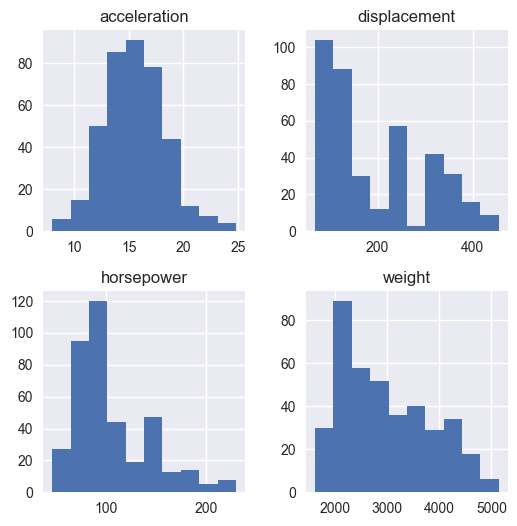

In [29]:
car_df[['acceleration', 'displacement', 'horsepower', 'weight']].hist(figsize  = [6, 6])
plt.show()

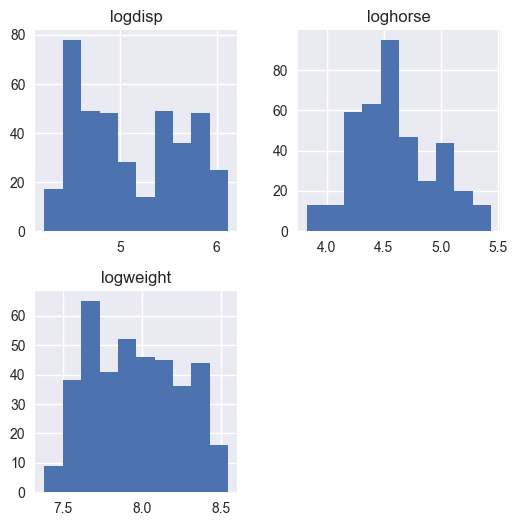

In [30]:
data_log = pd.DataFrame([])
data_log['logdisp'] = np.log(car_df['displacement'])
data_log['loghorse'] = np.log(car_df['horsepower'])
data_log['logweight'] = np.log(car_df['weight'])
data_log.hist(figsize  = [6, 6]);

### Log transformation

As seen in the previous lesson, a log transformation is a very useful tool when you have data that clearly does not follow a normal distribution. Log transformation can help reduce skewness when you have skewed data, and can help reducing variability of data. 

### Transformations that do not change the distribution of your data

#### Min-max scaling

When performing min-max scaling, you can transform x to get the transformed $x'$ by using the formula:

$$x' = \dfrac{x - \min(x)}{\max(x)-\min(x)}$$

This way of scaling brings all values between 0 and 1. 

#### Standardization

When 

$$x' = \dfrac{x - \bar x}{\sigma}$$

x' will have mean $\mu = 0$ and $\sigma = 1$

Note that standardization does not make data $more$ normal, it will just change the mean and the standard error!

#### Mean normalization
When performing mean normalization, you use the following formula:
$$x' = \dfrac{x - \text{mean}(x)}{\max(x)-\min(x)}$$

The distribution will have values between -1 and 1, and a mean of 0.

#### Unit vector transformation
 When performing unit vector transformations, you can create a new variable x' with a range [0,1]:
 
$$x'= \dfrac{x}{{||x||}}$$


Recall that the norm of x $||x||= \sqrt{(x_1^2+x_2^2+...+x_n^2)}$

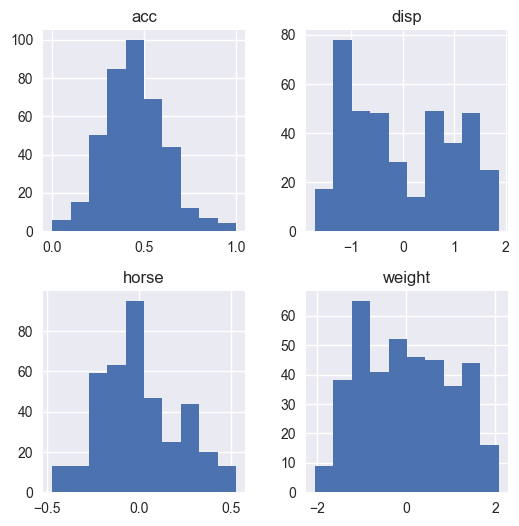

In [31]:
acc = car_df['acceleration']
logdisp = data_log['logdisp']
loghorse = data_log['loghorse']
logweight = data_log['logweight']

scaled_acc = (acc - min(acc)) / (max(acc) - min(acc))
scaled_disp = (logdisp - np.mean(logdisp)) / np.sqrt(np.var(logdisp))
scaled_weight = (logweight - np.mean(logweight)) / np.sqrt(np.var(logweight))
scaled_horse = (loghorse - np.mean(loghorse)) / (max(loghorse) - min(loghorse))

data_cont_scaled = pd.DataFrame([])
data_cont_scaled['acc'] = scaled_acc
data_cont_scaled['disp'] = scaled_disp
data_cont_scaled['horse'] = scaled_horse
data_cont_scaled['weight'] = scaled_weight

data_cont_scaled.hist(figsize = [6, 6]);

## f. Model Validation & Regression in Scikit-Learn

### The need for train-test split

#### Making predictions and evaluation

So far we've simply been fitting models to data, and evaluated our models calculating the errors between our $\hat y$ and our actual targets $y$, while these targets $y$ contributed in fitting the model.

The reason why we built the model in the first place, however, is because we want to predict the outcome for observations that are not necessarily in our dataset now; e.g: we want to predict miles per gallon for a new car that isn't part of our dataset, or for a new house in Boston.

In order to get a good sense of how well your model will be doing on new instances, you'll have to perform a so-called "train-test-split". What you'll be doing here, is take a sample of the data that serves as input to "train" our model - fit a linear regression and compute the parameter estimates for our variables, and calculate how well our predictive performance is doing comparing the actual targets $y$ and the fitted $\hat y$ obtained by our model.

#### Underfitting and overfitting

Another reason to use train-test-split is because of a common problem which doesn't only affect linear models, but nearly all (other) machine learning algorithms: overfitting and underfitting. An overfit model is not generalizable and will not hold to future cases. An underfit model does not make full use of the information available and produces weaker predictions than is feasible. The following image gives a nice, more general demonstration:

<img src="images/modelfit.png" width="700"> 

It is pretty straightforward that, to evaluate the model, you'll want to compare your predicted values, $\hat y$ with the actual value, $y$. The difference between the two values is referred to as the residuals. When using a train-test split, you'll compare your residuals for both test set and training set:

$r_{i,train} = y_{i,train} - \hat y_{i,train}$ 

$r_{i,test} = y_{i,test} - \hat y_{i,test}$ 

To get a summarized measure over all the instances in the test set and training set, a popular metric is the (Root) Mean Squared Error:

RMSE = $\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2}$

MSE = $\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$

Again, you can compute these for both the traing and the test set. A big difference in value between the test and training set (R)MSE is an indication of overfitting.

In [32]:
data = pd.read_csv('auto-mpg.csv') 
data.rename({'model year': 'year'}, axis='columns', inplace=True)

acc = data['acceleration']
logdisp = np.log(data['displacement'])
loghorse = np.log(data['horsepower'])
logweight = np.log(data['weight'])

scaled_acc = (acc-min(acc))/(max(acc)-min(acc))
scaled_disp = (logdisp-np.mean(logdisp))/np.sqrt(np.var(logdisp))
scaled_horse = (loghorse-np.mean(loghorse))/(max(loghorse)-min(loghorse))
scaled_weight = (logweight-np.mean(logweight))/np.sqrt(np.var(logweight))

data_fin = pd.DataFrame([])
data_fin['acc'] = scaled_acc
data_fin['disp'] = scaled_disp
data_fin['horse'] = scaled_horse
data_fin['weight'] = scaled_weight
cyl_dummies = pd.get_dummies(data['cylinders'], prefix='cyl', drop_first=True)
yr_dummies = pd.get_dummies(data['year'], prefix='yr', drop_first=True)
orig_dummies = pd.get_dummies(data['origin'], prefix='orig', drop_first=True)
mpg = data['mpg']
data_fin = pd.concat([mpg, data_fin, cyl_dummies, yr_dummies, orig_dummies], axis=1)

### Scikit-Learn!

In [33]:
data = pd.concat([mpg, scaled_acc, scaled_weight, orig_dummies], axis=1)
y = data[['mpg']]
X = data.drop(['mpg'], axis=1)

In [35]:
pip install sklearn

Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\USER PC\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

print('Train Root Mean Squarred Error:', train_mse**0.5)
print('Test Root Mean Squarred Error:', test_mse**0.5)

Train Mean Squarred Error: 16.79026189951861
Test Mean Squarred Error: 16.500020627881497
Train Root Mean Squarred Error: 4.097592207567587
Test Root Mean Squarred Error: 4.062021741433876
